In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy.stats as stats

In [2]:
#kijiji_filepath = os.path.join("..""Desktop", "UofT Tools", "Car_ETL_PROJECT", "kijiji_clean_mpgdata.csv")

kijiji_df = pd.read_csv("kijiji_clean_mpgdata.csv")
kijiji_df.head()

#car_df = pd.read_csv('kijiji_mpgdata.csv')

,Unnamed: 0,brand,Year,mpg,Displacement,list_price
0,1,Volkswagen,2013,18.0,2.0,11450
1,2,Volkswagen,2013,21.0,2.0,11450
2,5,Honda,2015,18.0,3.5,15499
3,6,Honda,2015,21.0,3.5,15499
4,7,Honda,2015,21.0,3.5,15499


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


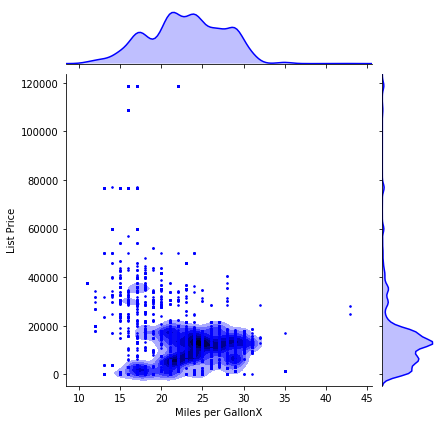

In [14]:
#Chart 1 List Price vs Mpg

g = sb.jointplot(x="mpg", y="list_price", data=kijiji_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="b", s=10, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Miles per GallonX", "List Price");

# Save figure and show it
plt.savefig('Distribution of Mpg vs List Price Chart 1.png', dpi = 199)
plt.show()

## Distribution of Mpg vs List Price Chart

####  Question:  Can a relationship be made between car prices and fuel econnomy? 

Chart showing the displacement of individual results underlaid by a distribution graph showing the highest density of results.
This database was almost entirely made up of used cars, therefore the results we see are a representation of the fuel economy in relation to the list price of available used cars.  The final conclusion here is that in small numbers, used cars of all fuel economies are available across all price points.  However there is a trend with the majority of $5k-$10k cars having 20mpg or less. The trend gradually increases to demonstrate that a high number of used cars are available at the $15k-$20k price point that are far more fuel efficient, between 23 and 30 mpg.  These results are driven by two main factors, 1/ New cars tend to have better fuel economy, and newer used cars are more expensive.  Secondly, Cars with higher fuel economy and the technologies associated with them also tend to be more expensive.

  

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


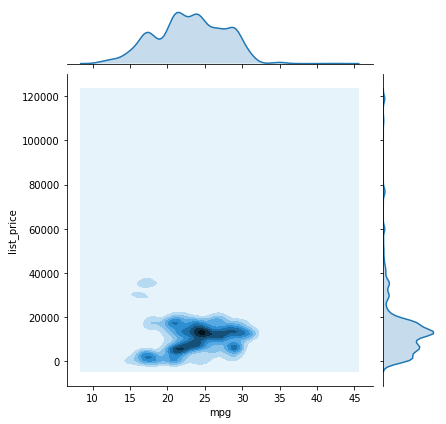

In [4]:
sb.jointplot(x="mpg", y="list_price", data=kijiji_df, kind="kde");

# Save figure and show it
plt.savefig('Distribution of Mpg vs List Price Chart 2.png', dpi = 199)
plt.show()


## Distribution of Mpg vs List Price Chart 

####  Question:  Can a relationship be made between car prices and fuel econnomy? 

The above chart shows the highest density in the distribution of results. This database was almost entirely made up of used cars, therefore the results we see are a representation of the fuel economy in relation to the list price of available used cars. The final conclusion here is that in small numbers, used cars of all fuel economies are available across all price points. However there is a trend with the majority of  5k− 10k cars having 20mpg or less. The trend gradually increases to demonstrate that a high number of used cars are available at the  15k− 20k price point that are far more fuel efficient, between 23 and 30 mpg. These results are driven by two main factors, 1/ New cars tend to have better fuel economy, and newer used cars are more expensive. Secondly, Cars with higher fuel economy and the technologies associated with them also tend to be more expensive.

In [5]:
disp_mpg_df = kijiji_df.loc[:, ['Displacement', 'mpg']]

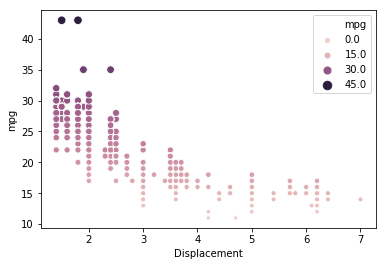

In [6]:
ax = sb.scatterplot(x="Displacement", y="mpg",
                     hue="mpg", size="mpg",
                     data=disp_mpg_df)

# Save figure and show it
plt.savefig('Scatter_Plot_Mph_by_Displacement.png', dpi = 199)
plt.show()

# Print R-Squared
#print(f"R-Squared = {round(rvalue**2,3)}")
#print(f"p-value = {pvalue}")

##  Mpg vs Displacement Chart

####  Question:  Can a relationship be made between displacement (motor size) and fuel econnomy? 

This chart displays the relationship between displacement and fuel economy.  In modern cars, lower displacement turbo charged motors are producing the same or even more horsepower than the larger displacement naturally aspirated motors.  The graph here seems to indicate that fuel economy improves with smaller displacement regardless of turbo charging and horsepower gains.  There are a couple “outliers” with “super fuel efficiency”.  These are the result of small displacement “Hybrids” which supplement combustion power with electrical power, and represent another level of fuel economy.  
 

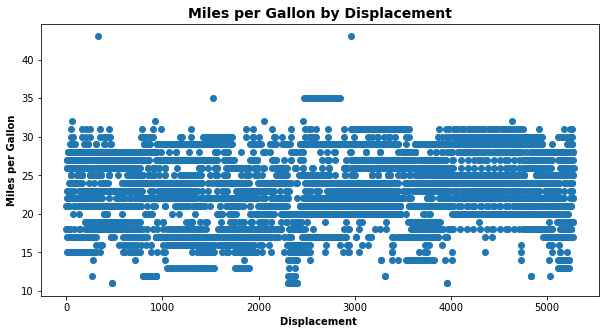

In [8]:
# Plot Miles per Gallon vs Displacement
plt.figure(figsize=(10,5))
plt.title('Miles per Gallon by Displacement', fontweight = 'bold', fontsize = 14)
plt.xlabel('Displacement ', fontweight = 'bold')
plt.ylabel('Miles per Gallon', fontweight = 'bold')
plt.scatter(kijiji_df.index, kijiji_df["mpg"])

# Plot line of best fit
#slope, intercept, rvalue, pvalue, _ = stats.linregress(kijiji_df.index, kijiji_df['Displacement'])
#x = np.arange(0, 7.0)
#y = slope*x + intercept
#plt.plot(x, y, color = 'r')

# Save figure and show it
plt.savefig('Scatter Plot of Miles per Gallon by Displacement and Line of Best Fit.png', dpi = 199)
plt.show()

# Print R-Squared
#print(f"R-Squared = {round(rvalue**2,3)}")
#print(f"p-value = {pvalue}")

This graph looks more like moris code=  Couldn't get it to display anything meaningful in the skatter plot.  The one above it is a far better representation of the same thing.

In [9]:
brand_mpg_df = kijiji_df.groupby('brand')['mpg'].mean()


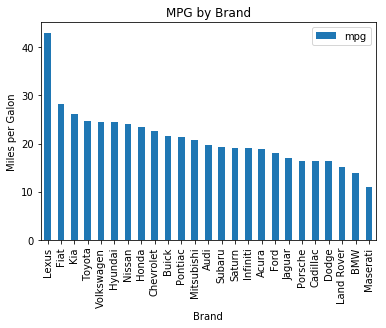

In [10]:
new_df = brand_mpg_df.to_frame()
sorted_brand_mpg_df=new_df.sort_values("mpg", ascending=False)
sorted_brand_mpg_df.plot(kind = 'bar',title = 'MPG by Brand')
plt.ylabel ("Miles per Galon")
plt.xlabel ("Brand")


# Save figure and show it
plt.savefig('Bar Chart Brand vs Mpg.png', dpi = 199)
plt.show()


## Mpg vs Brand Chart

#### Question: Can a relationship be made between car brand (make) and fuel econnomy?

This bar graph displays the relationship between car manufacturer and fuel economy.  As expected, there is a clear correlation between the entry level or “economy brands having better fuel economy.  Luxury and sports cars tend to put a premium on power and weigh more, while economy cars put more emphasis on operating costs.   This trend can be clearly seen with one exception:  Lexus, while being a “luxury” brand,  in this particular data set is number 1 for fuel economy.   This can be explained by the fact that Toyota was one of the first to the mass-market with hybrid technology (Prius).  They were also one of the first to introduce this hybrid technology to their luxury division (Lexus).  As this database is based on used cars, it stands to reason that both Toyota and lexus would be found in the top 4 for fuel economy. The other two in the top 4 are Fiat and Kia who are both  known for primarily making sub-compact cars which by nature are very fuel efficient.          

In [11]:
year_disp_mpg_df = kijiji_df.loc[:, ['Year', 'Displacement', 'mpg']]

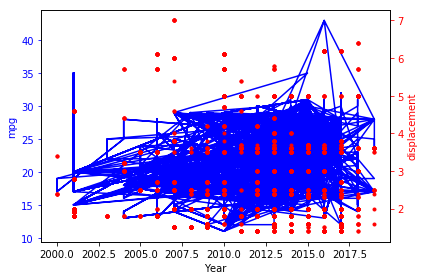

In [12]:
fig, ax1 = plt.subplots()

#set the x-axis
t = year_disp_mpg_df['Year']

#set the first y-axis
s1 = year_disp_mpg_df['mpg']
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('mpg', color='b')
ax1.tick_params('y', colors='b')

#set the second y-axis
ax2 = ax1.twinx()
s2 = year_disp_mpg_df['Displacement']
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('displacement', color='r')
ax2.tick_params('y', colors='r')

#plot it
fig.tight_layout()
plt.show()

I couldn't get either of these two "multi Y axis" charts to work.  I going to keep messing around with them, but I don't think I will have anything before the deadline. 

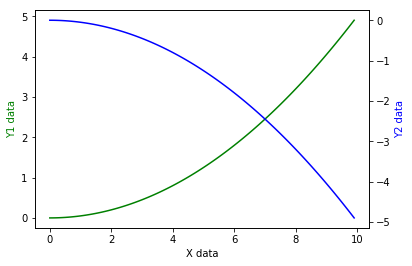

In [13]:
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()